# Advanced Monte Carlo Methods - EMAp
## Sequential Monte Carlo (chap 10)

### Natural Filtering

In [257]:
import numpy as np
import numpy.random as rnd
import scipy.stats as stat
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [258]:
# Parameters
T = 24
mu = 5
phi = 0.9
nu = 0.5
sigma = 1

In [259]:
# Generating true states
x_true = np.ones(T)
y = np.ones(T)

x_true[0] = rnd.normal(loc = mu, scale = nu/np.sqrt((1-phi**2)))
y[0] = x_true[0] + sigma*rnd.normal()

for t in range(1,T):
    x_true[t] = mu + phi*(x_true[t-1] - mu) + nu*rnd.normal()
    y[t] = x_true[t] + sigma*rnd.normal()

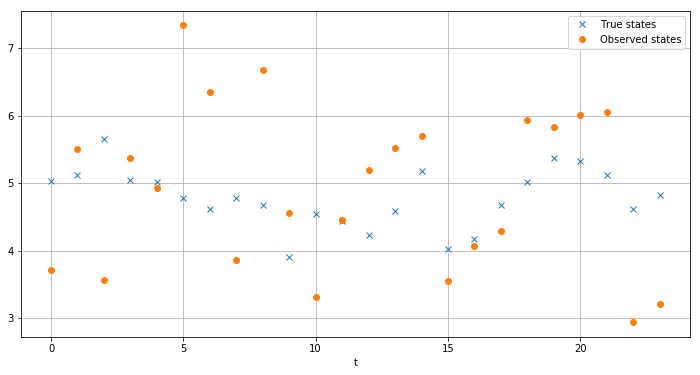

In [260]:
# Visualizing data
plt.figure(figsize = (12,6))
plt.plot(x_true, 'x')
plt.plot(y, 'o')
plt.legend(['True states','Observed states'])
plt.grid(True)
plt.xlabel("t")
plt.show()

In [265]:
# Allocating memory
N = 100
W = np.zeros((N, T))
X = np.zeros((N, T))
ESS = np.zeros(T)

# First draw
X[:, 0] = rnd.normal(mu, nu/(1-phi**2), N)
W[:, 0] = stat.norm.pdf(y[0], loc = X[:,1], scale = sigma)
W[:, 0] /= (W[:,0].sum())

In [266]:
# Main loop
for t in range(1,T):
    X[:, t] = rnd.normal(mu + phi*(X[:,t-1] - mu), nu)
    log_weight = np.log(W[:, t-1]) + np.log(stat.norm.pdf(y[t], loc = X[:, t], scale = sigma))
    W[:, t] = np.exp(log_weight)
    W[:, t] /= W[:, t].sum()
    
    # Computing effective sample size using the approximation from lecture notes
    ESS[t] = 1/((W[:,t]**2).sum())

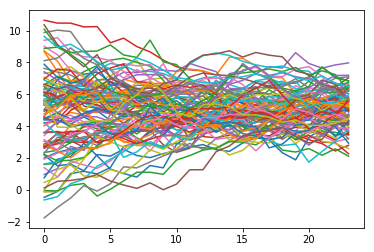

In [267]:
# Just a cute exercise visualizing particles
for i in range(N):
    plt.plot(X[i,:])
    
plt.show()

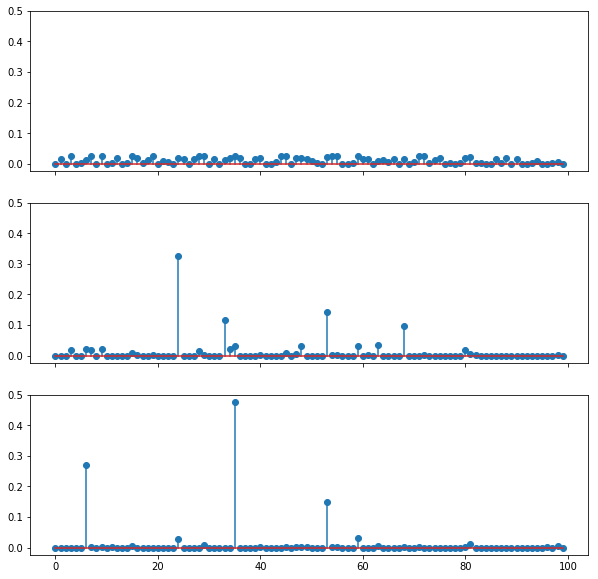

In [268]:
# Let's visualize weights
stamps = [1, 10, 23]
fig, (w1, w2, w3) = plt.subplots(3, sharex=True, sharey=True)
w1.stem(W[:, stamps[0]])
w2.stem(W[:, stamps[1]])
w3.stem(W[:, stamps[2]])
fig.set_figheight(10)
fig.set_figwidth(10)
plt.show()

<function matplotlib.pyplot.show>

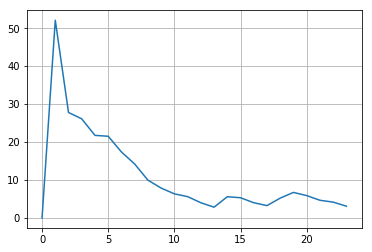

In [271]:
# Let's visualize ESS
plt.plot(ESS, '-')
plt.grid(True)
plt.show